In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [12]:
warnings.simplefilter("ignore")

In [57]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
#splitting the data into  X and Y
X=dataset.iloc[:,2:4].values
Y=dataset.iloc[:,-1].values

In [16]:
#library to split into train and test
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
#Feature Scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)#Fitting the data into logistic regression model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
y_pred=classifier.predict(x_test)#predicting the data

In [23]:
from sklearn.metrics import confusion_matrix 

In [24]:
cm=confusion_matrix(y_test,y_pred)

In [25]:
cm

array([[48,  3],
       [10, 19]], dtype=int64)

In [26]:
from matplotlib.colors import ListedColormap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


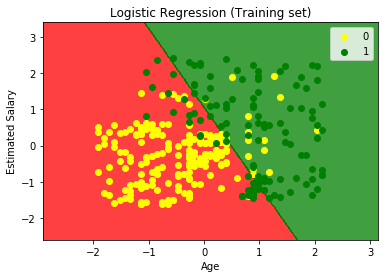

In [55]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


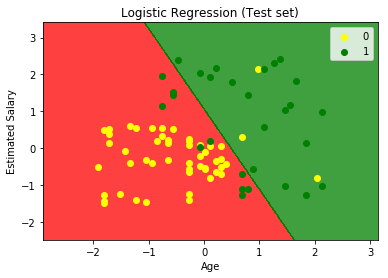

In [56]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('yellow', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### ROC CURVE

In [31]:
prob=classifier.predict_proba(x_test)

In [34]:
prob #element at the zeroth index of each list gives teh probability of class zero

array([[0.76226333, 0.23773667],
       [0.68458091, 0.31541909],
       [0.58593637, 0.41406363],
       [0.99870124, 0.00129876],
       [0.99368477, 0.00631523],
       [0.66042546, 0.33957454],
       [0.83966798, 0.16033202],
       [0.09889912, 0.90110088],
       [0.65927805, 0.34072195],
       [0.99895767, 0.00104233],
       [0.31170662, 0.68829338],
       [0.93870355, 0.06129645],
       [0.92450247, 0.07549753],
       [0.98939302, 0.01060698],
       [0.86675484, 0.13324516],
       [0.99027363, 0.00972637],
       [0.98900228, 0.01099772],
       [0.82532673, 0.17467327],
       [0.96753319, 0.03246681],
       [0.92215493, 0.07784507],
       [0.97669415, 0.02330585],
       [0.03376529, 0.96623471],
       [0.99270387, 0.00729613],
       [0.94706832, 0.05293168],
       [0.97942744, 0.02057256],
       [0.71040112, 0.28959888],
       [0.83851761, 0.16148239],
       [0.03203486, 0.96796514],
       [0.67364134, 0.32635866],
       [0.99889006, 0.00110994],
       [0.

In [40]:
from sklearn import metrics

Area under the curve: 0.9323867478025692


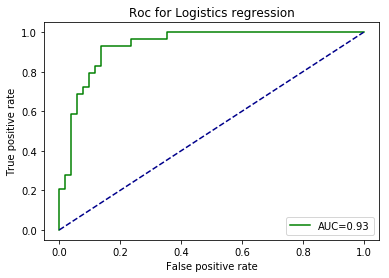

In [54]:
prob_positive=prob[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve:",roc_auc)
plt.plot(fpr,tpr,"green",label="AUC=%0.2f"%roc_auc)
plt.title("Roc for Logistics regression")
plt.legend(loc="lower right")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()